# Marketing Compaign - Data Cleaning, EDA and Feature Engineering

In [1]:
# importing the required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
df_main = pd.read_csv("marketing_data.csv")
df_main.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP


In [3]:
#check the shape of the dataset , number of rows and columns
df_main.shape

(2240, 28)

In [4]:
# check info of the datset like datatypes in int, object
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4    Income              2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

In [5]:
# using describe method to check the stats of the datset like, mean, standard deviation , percentile
df_main.describe()

,ID,Year_Birth,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,...,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.149107,0.009375
std,3246.662198,11.984069,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,...,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.356274,0.096391
min,0.000000,1893.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,1959.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,...,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5458.500000,1970.000000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,...,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8427.750000,1977.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,...,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,11191.000000,1996.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,...,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Data Cleaning

In [6]:
# check how many features have total null values
df_main.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
 Income                24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
Complain                0
Country                 0
dtype: int64

In [7]:
# creating a copy of the dataframe, to avoid direct modification on the main datset.
df = df_main.copy()

In [8]:
# drop duplicates if any and check using shape to verify the shape
df.drop_duplicates(subset='ID', inplace=True)
df.shape

(2240, 28)

In [9]:
# check columns for extra spaces
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', ' Income ',
       'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country'],
      dtype='object')

In [10]:
#There is extra space in column name ex- Income column has space before and after the Income column name.
df.columns = df.columns.str.strip()
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country'],
      dtype='object')

In [11]:
df['Income'].isnull().sum()
# so there are 24 null values in the Income feature.

np.int64(24)

In [12]:
df['Income'].unique()

array(['$84,835.00 ', '$57,091.00 ', '$67,267.00 ', ..., '$46,310.00 ',
       '$65,819.00 ', '$94,871.00 '], dtype=object)

In [13]:
# Remove all the $ and comma from the Income feature so that we have all the values converted to float type
df['Income'] = df['Income'].str.strip()
chars_to_remove = ["$", ","]
for item in chars_to_remove:
    df['Income'] = df['Income'].str.replace(item, '')

In [14]:
# Transform the income to numeric from string type
df['Income'] = pd.to_numeric(df['Income'], errors="coerce")

In [15]:
df.head(2) #verify Income column cleaned with $ and , and converted to float

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,57091.0,0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA


In [16]:
df['Income'].info() #verify Income feature values converted to float

<class 'pandas.core.series.Series'>
RangeIndex: 2240 entries, 0 to 2239
Series name: Income
Non-Null Count  Dtype  
--------------  -----  
2216 non-null   float64
dtypes: float64(1)
memory usage: 17.6 KB


### Problem Statement: Income values for a few customers are missing. Perform missing value imputation. Assume that the customers with similar education and marital status make the same yearly income, on average. 



#### Mean Imputation of Income using Average income of group by Education and Marital_Status. 

In [17]:
df['Education'].unique()

array(['Graduation', 'PhD', '2n Cycle', 'Master', 'Basic'], dtype=object)

In [18]:
df['Marital_Status'].unique()

array(['Divorced', 'Single', 'Married', 'Together', 'Widow', 'YOLO',
       'Alone', 'Absurd'], dtype=object)

In [19]:
#Group by Education and Marital_Status to get the average of their income.
mean_income_grp_by = df.groupby(['Education', 'Marital_Status'])['Income'].mean()
print(mean_income_grp_by)

Education   Marital_Status
2n Cycle    Divorced          49395.130435
            Married           46201.100000
            Single            53673.944444
            Together          44736.410714
            Widow             51392.200000
Basic       Divorced           9548.000000
            Married           21960.500000
            Single            18238.666667
            Together          21240.071429
            Widow             22123.000000
Graduation  Absurd            79244.000000
            Alone             34176.000000
            Divorced          54526.042017
            Married           50800.258741
            Single            51322.182927
            Together          55758.480702
            Widow             54976.657143
Master      Absurd            65487.000000
            Alone             61331.000000
            Divorced          50331.945946
            Married           53286.028986
            Single            53530.560000
            Together       

In [20]:
# Apply row wise update using lambda to get the mean from group by, for replacing nan values
df['Income'] = df.apply(
    lambda row: mean_income_grp_by.get((row['Education'], row['Marital_Status']), row['Income']) 
    if pd.isna(row['Income']) else row['Income'], axis=1
)
df['Income'].isnull().sum() #no null values present after the imputation

np.int64(0)

## Feature Engineering

In [21]:
df['Dt_Customer'].unique()

array(['6/16/14', '6/15/14', '5/13/14', '5/11/14', '4/8/14', '3/17/14',
       '1/29/14', '1/18/14', '1/11/14', '12/27/13', '12/9/13', '12/7/13',
       '10/16/13', '10/5/13', '9/11/13', '8/1/13', '7/23/13', '7/1/13',
       '5/28/13', '3/26/13', '3/15/13', '2/12/13', '11/23/12', '10/13/12',
       '9/14/12', '6/29/14', '5/31/14', '5/30/14', '4/27/14', '4/11/14',
       '10/29/13', '10/9/13', '5/10/13', '5/9/13', '4/25/13', '4/20/13',
       '3/30/13', '3/1/13', '2/14/13', '1/11/13', '1/3/13', '12/19/12',
       '12/15/12', '12/2/12', '9/17/12', '9/11/12', '5/12/14', '4/28/14',
       '3/29/14', '3/6/14', '3/4/14', '2/4/14', '2/3/14', '1/1/14',
       '12/12/13', '11/15/13', '9/20/13', '9/5/13', '8/31/13', '7/30/13',
       '7/27/13', '6/22/13', '1/5/13', '11/21/12', '11/11/12', '9/28/12',
       '9/27/12', '9/7/12', '8/13/12', '8/11/12', '8/2/12', '6/25/14',
       '5/28/14', '4/14/14', '3/10/14', '2/27/14', '2/7/14', '1/28/14',
       '11/17/13', '11/7/13', '10/17/13', '10/13/13', '1

In [22]:
#Feature engineering : new feature Day Month Year from the feature, Date of Customer Enrolment
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%m/%d/%y')
df['Day_Customer_Enroll'] = df['Dt_Customer'].dt.day
df['Month_Customer_Enroll'] = df['Dt_Customer'].dt.month
df['Year_Customer_Enroll'] = df['Dt_Customer'].dt.year

In [23]:
df.head(2) # verify the 3 new date features updated in the data frame

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Day_Customer_Enroll,Month_Customer_Enroll,Year_Customer_Enroll
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,...,0,0,0,0,1,0,SP,16,6,2014
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,...,0,0,0,1,1,0,CA,15,6,2014


### Problem Statement : Create variables to populate the total number of children, age, and total spending.

In [24]:
# create feature, total number of children
df['Total_Children'] = df['Kidhome'] + df['Teenhome']

In [25]:
# create feature, age of the customer
current_year = datetime.now().year
df['Age'] = current_year - df['Year_Birth']

In [26]:
# create feature, total spending from the amount features (sum of all the amount columns) : row wise sum
df['Total_Spending'] = df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 
                           'MntSweetProducts', 'MntGoldProds']].sum(axis=1)

In [27]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp2,Response,Complain,Country,Day_Customer_Enroll,Month_Customer_Enroll,Year_Customer_Enroll,Total_Children,Age,Total_Spending
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,...,0,1,0,SP,16,6,2014,0,54,1190
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,...,1,1,0,CA,15,6,2014,0,63,577
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,...,0,0,0,US,13,5,2014,1,66,251
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,...,0,0,0,AUS,11,5,2014,2,57,11
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,...,0,1,0,SP,8,4,2014,1,35,91


## Visualization

### Which products are performing the best, and which are performing the least in terms of revenue?

In [28]:
product_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
product_revenue = df[product_columns].sum()
product_revenue_df = product_revenue.reset_index()
product_revenue_df.columns = ['Product', 'Revenue']
product_revenue_df = product_revenue_df.sort_values(by="Revenue", ascending=False)
product_revenue_df

,Product,Revenue
0,MntWines,680816
2,MntMeatProducts,373968
5,MntGoldProds,98609
3,MntFishProducts,84057
4,MntSweetProducts,60621
1,MntFruits,58917


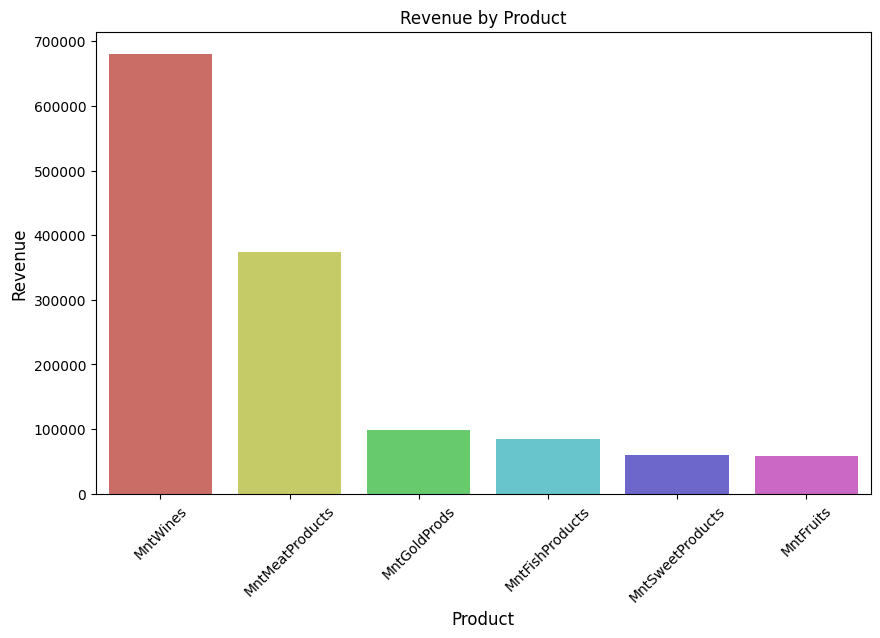

In [70]:
plt.figure(figsize=(10,6))
sns.barplot(x="Product", 
            y="Revenue",
            data=product_revenue_df,
            palette='hls',
            hue="Product"
           )
plt.title("Revenue by Product")
plt.xlabel('Product', fontsize=12)
plt.ylabel('Revenue', fontsize=12)
plt.xticks(rotation=45)
plt.show()

### Insights
#### Best performing Product is: `Wine` with Reveneu of - `$680816`
#### Least performing Product is: `Fruits` with Reveneu of - `$58917`

### Is there any pattern between the age of customers and the last campaign acceptance rate?

In [72]:
df_age_acceptance_rate = df.groupby('Age')['Response'].mean().reset_index()
df_age_acceptance_rate.columns = ['Age', 'Compaign Acceptance Rate']
df_age_acceptance_rate.head()

,Age,Compaign Acceptance Rate
0,28,0.500000
1,29,0.200000
2,30,0.333333
3,31,0.400000
4,32,0.076923


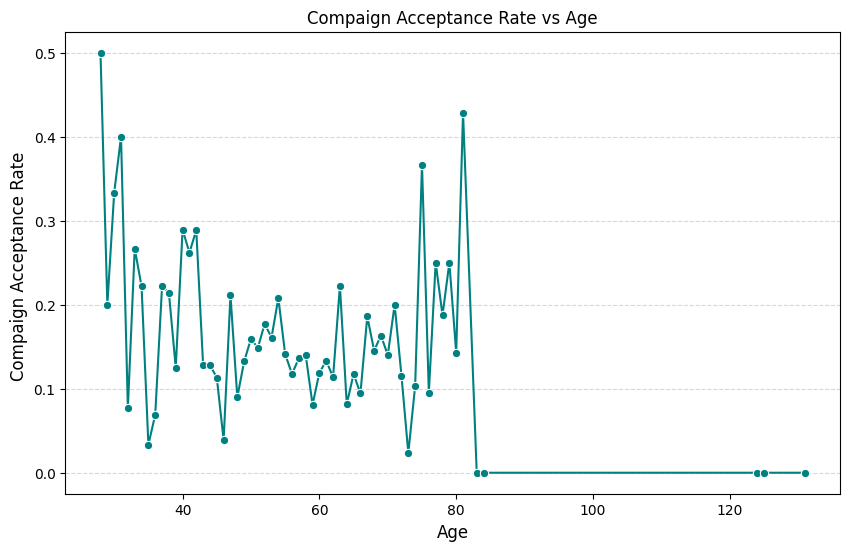

In [73]:
plt.figure(figsize=(10,6))
sns.lineplot(
    x='Age',
    y='Compaign Acceptance Rate',
    data=df_age_acceptance_rate,
    marker="o",
    color="teal",
)
plt.title("Compaign Acceptance Rate vs Age")
plt.xlabel("Age", fontsize=12)
plt.ylabel("Compaign Acceptance Rate ", fontsize=12)
plt.grid(axis='y', linestyle="--", alpha=0.5)
plt.show()

### Insights

#### People under the age group below 30 accepted more offer. People in the age group (15 to 30), mostly children and younger accepted more offer almost 50% on an average. 
#### There is decrease in acceptance of offer in the age group from (40 to 70)
#### There is significant rise in the acceptance of offer from (70 to 80) age group.
#### For the age group above 80, there seems to be no acceptance of offer almost 0%.

### Which Country has the greatest number of customers who accepted the last campaign?

In [57]:
df['Country'].unique()

array(['SP', 'CA', 'US', 'AUS', 'GER', 'IND', 'SA', 'ME'], dtype=object)

In [71]:
df_country_by_offer_acceptance = df.groupby("Country")['Response'].sum().reset_index()
df_country_by_offer_acceptance.columns = ['Country', "Last Campaign Acceptance"]
df_country_by_offer_acceptance = df_country_by_offer_acceptance.sort_values("Last Campaign Acceptance", ascending=False)
df_country_by_offer_acceptance

,Country,Last Campaign Acceptance
6,SP,176
5,SA,52
1,CA,38
0,AUS,23
2,GER,17
3,IND,13
7,US,13
4,ME,2


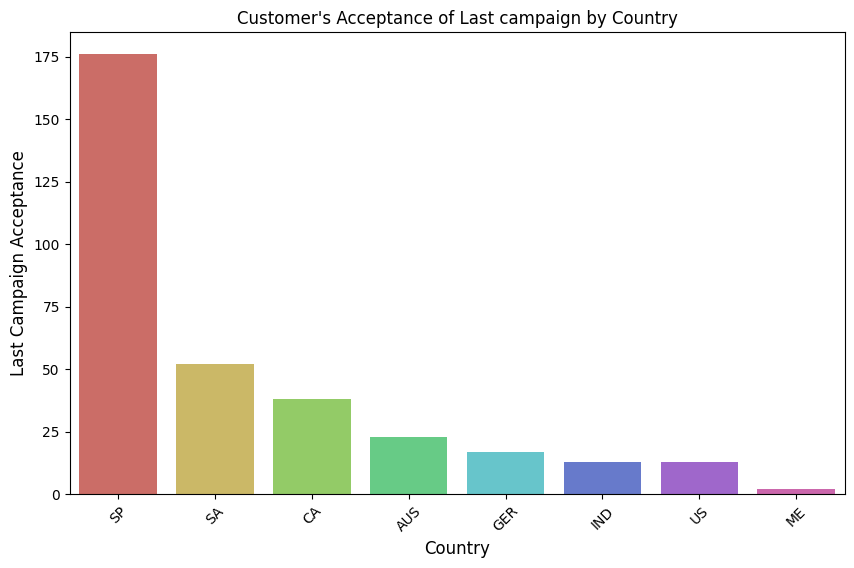

In [69]:
plt.figure(figsize=(10,6))
sns.barplot(
    x="Country",
    y="Last Campaign Acceptance",
    data=df_country_by_offer_acceptance,
    palette="hls",
    hue="Country"
)
plt.title("Customer's Acceptance of Last campaign by Country")
plt.xlabel("Country", fontsize=12)
plt.ylabel("Last Campaign Acceptance", fontsize=12)
plt.xticks(rotation=45)
plt.show()

### Insight
#### The country, Spain has highest number of customers who accepted the last campaign. 

### Do you see any pattern in the no. of children at home and total spend?

In [74]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Response,Complain,Country,Day_Customer_Enroll,Month_Customer_Enroll,Year_Customer_Enroll,Total_Children,Age,Total_Spending,acceptance_rate_by_age
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,...,1,0,SP,16,6,2014,0,54,1190,NaN
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,...,1,0,CA,15,6,2014,0,63,577,NaN
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,...,0,0,US,13,5,2014,1,66,251,NaN
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,...,0,0,AUS,11,5,2014,2,57,11,NaN
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,...,1,0,SP,8,4,2014,1,35,91,NaN


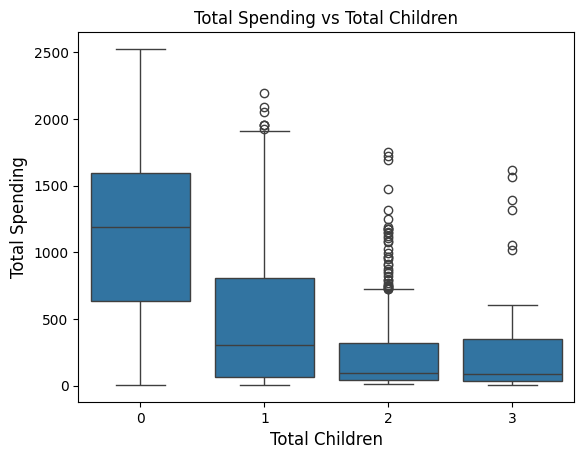

In [83]:
plt.title("Total Spending vs Total Children")
sns.boxplot(
    x="Total_Children",
    y="Total_Spending",
    data=df
)
plt.xlabel('Total Children', fontsize=12)
plt.ylabel('Total Spending', fontsize=12)
plt.show()

### Insights
#### Customers with 0 children : Spending more. The higher IQR shows, that there are significant number of customers spending more.
#### Customers with 1 Child : Spending drops as compared to the customers with 0 children. The IQR shows that significant number of customers spends less than the median spending .
#### Customer with more than 1 children(2,3) : Spending is very less. The IQR shows that there are significantly more customers who tends to spends less with more than 1 children.
#### For Customers with 1 and 2 children, there are some outliers which suggest that, there are few customers with higher spending in this category.

### Education background of the customers who complained in the last 2 years.

In [84]:
df['Education'].unique()

array(['Graduation', 'PhD', '2n Cycle', 'Master', 'Basic'], dtype=object)

In [86]:
df_education_with_complain = df.groupby('Education')['Complain'].sum().reset_index()
df_education_with_complain = df_education_with_complain.sort_values("Complain", ascending=False)
df_education_with_complain

,Education,Complain
2,Graduation,14
0,2n Cycle,4
3,Master,2
4,PhD,1
1,Basic,0


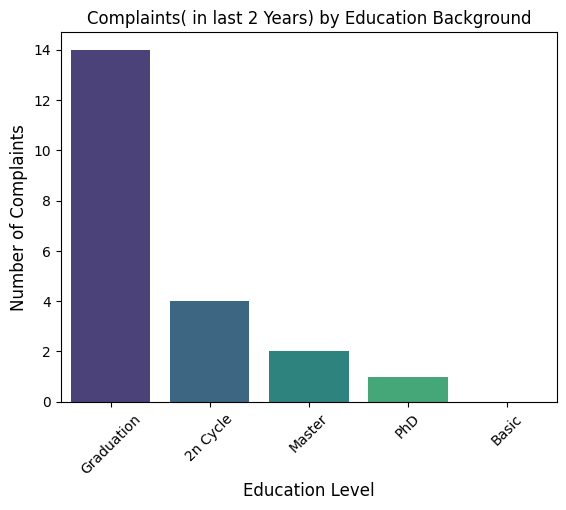

In [99]:
plt.title("Complaints( in last 2 Years) by Education Background")
sns.barplot(
    x='Education',
    y='Complain',
    data=df_education_with_complain,
    palette='viridis',
    hue='Education'
)
plt.xlabel('Education Level', fontsize=12)
plt.ylabel('Number of Complaints', fontsize=12)
plt.xticks(rotation=45)
plt.show()

### Insight
#### Customer who are Graduated have more number of Complaints in last 2 years.
#### This indicates that there are high customer service and support required for people who are Graduated.